# Public data exploration

The objective of this notebook is to explore some public dataset that may be used to feed a realistic dataset of care trajectories.

We explore datasets that can help to create a realistic population of patient (bases on demographic datasets) and datasets about care deliveries.

There are two main sources of the datasets:

- the Ministry of Health that provides aggregate statistics from the SNIIRAM database about the cares. This figures are very interesting in our case because it contains statistics coming from the original data we are mimicing.
- the INSEE (french national institute of statistics). It provides useful information about the french population demography.

<span style="color:orange;">**WARNING**: data are sometimes huge! I did not save them in the Git repository. For each experiment, the source of the data are given and assumed to be saved in the `../data` repository.</span>


## Prelimiaries
Some library import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

## Open medic dataset
source: https://www.data.gouv.fr/fr/datasets/open-medic-base-complete-sur-les-depenses-de-medicaments-interregimes/

Open medic is a dataset which contains aggregated counts of deliveries of medics to the French population. It originates from the SNIIRAM dataset. There is no information about the location of drug deliveries or location of beneficiaries.

Load the open medic CSV dataset from the zip file thanks to the pandas library!

In [2]:
data = pd.read_csv("../data/OPEN_MEDIC_2019.zip", header=0, sep=';', encoding="latin_1")
#remove labels of drugs (just keep the codes)
try:
    del(data['l_ATC1'])
    del(data['L_ATC2'])
    del(data['L_ATC3'])
    del(data['L_ATC4'])
    del(data['L_ATC5'])
    del(data['l_cip13'])
except:
    pass

In [3]:
#show the first rows of the dataset
data

,ATC1,ATC2,ATC3,ATC4,ATC5,CIP13,TOP_GEN,GEN_NUM,age,sexe,BEN_REG,PSP_SPE,BOITES,REM,BSE
0,A,A01,A01A,A01AA,A01AA01,3400931911999,0,0,0,1,5,1,113,"53,31","191,53"
1,A,A01,A01A,A01AA,A01AA01,3400931911999,0,0,0,1,5,12,152,"77,60","258,68"
2,A,A01,A01A,A01AA,A01AA01,3400931911999,0,0,0,1,5,90,74,"33,50","126,72"
3,A,A01,A01A,A01AA,A01AA01,3400931911999,0,0,0,1,5,98,13,"6,56","21,87"
4,A,A01,A01A,A01AA,A01AA01,3400931911999,0,0,0,1,11,1,106,"39,47","136,74"
5,A,A01,A01A,A01AA,A01AA01,3400931911999,0,0,0,1,11,12,549,"216,07","708,63"
6,A,A01,A01A,A01AA,A01AA01,3400931911999,0,0,0,1,11,90,134,"53,99","172,86"
7,A,A01,A01A,A01AA,A01AA01,3400931911999,0,0,0,1,11,98,137,"54,18","176,73"
8,A,A01,A01A,A01AA,A01AA01,3400931911999,0,0,0,1,24,1,39,"14,32","50,31"
9,A,A01,A01A,A01AA,A01AA01,3400931911999,0,0,0,1,24,12,66,"25,54","85,14"


The dataset gives the number of drug boxes delivered (in pharmacies, not in hospitals) 

Description of the columns

- `CIP13` is the barcode of the drug box
- `ATC5` is the classification of the drug (active component) in the international ATC taxonomy (ATC1 to ATC4 are the sublevels) 
- `age` is a class of ages of the beneficiaries  (0, 20, 60 or 99)
- `sexe` is the sexe of the beneficiaries 
- `BEN_REG` region of the beneficiaries
- `TOP_GEN` generic-brand {'0', '9', 'G', 'R', 'S'}
- `TOP_GEN` generic group (0 if none)
- `PSP_SPE` speciality of the prescriber
- `BOITES` total of drug boxes that have been delivered during year 2019 to people of given sex, in given age group with a given regime by a given prescriber's specialty
- `REM` and `BSE` are related to the costs


In [4]:
print("TOP_GEN: "+str(set(data['TOP_GEN'])))
print("GEN_NUM: "+str(set(data['GEN_NUM'])))
print("age: "+str(set(data['age'])))
print("sexe: "+str(set(data['sexe'])))
print("BEN_REG: "+str(set(data['BEN_REG'])))
print("PSP_SPE: "+str(set(data['PSP_SPE'])))


TOP_GEN: {'0', 'S', '9', 'G', 'R'}
GEN_NUM: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 19, 20, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 43, 45, 50, 51, 54, 55, 56, 57, 59, 60, 65, 66, 67, 68, 69, 70, 71, 72, 73, 78, 79, 80, 81, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 108, 117, 118, 119, 120, 124, 125, 126, 127, 128, 129, 130, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 165, 166, 167, 168, 170, 171, 174, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 187, 188, 191, 192, 193, 194, 195, 196, 201, 202, 203, 205, 206, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 230, 231, 233, 234, 237, 238, 239, 240, 241, 242, 243, 245, 247, 248, 249, 250, 251, 252, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 266, 267, 268, 269, 271, 272, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 293, 294, 295, 296

Remove some useless colums, and gather some lines togethers

In [5]:
try:
    del(data['ATC1'])
    del(data['ATC2'])
    del(data['ATC3'])
    del(data['ATC4'])
    del(data['TOP_GEN'])
    del(data['GEN_NUM'])
    del(data['REM'])
    del(data['BSE'])
except:
    pass

## The following lines keep only the meaningful dimensions
drugs=data.groupby(["age","sexe","ATC5","CIP13"]).agg({"BOITES":["sum"]}) #compute a group object
drugs = drugs.reset_index() #transform the group object into a dataframe
drugs.columns = drugs.columns.get_level_values(0)
print("Number of lines: %d"%len(drugs))



Number of lines: 62850


In [6]:
#show the data sorted by descending order of the number of boxes
drugs.sort_values( by=["BOITES"], ascending=False )

,age,sexe,ATC5,CIP13,BOITES
53604,60,2,N02BE01,3400935955838,40447065
31408,20,2,N02BE01,3400935955838,38276594
42593,60,1,N02BE01,3400935955838,28024402
20468,20,1,N02BE01,3400935955838,26999028
53646,60,2,N02BE01,3400941533969,19047699
53609,60,2,N02BE01,3400936158832,17703758
53568,60,2,N02BE01,3400932679041,16223081
36084,60,1,B01AC06,3400934744198,12005540
31452,20,2,N02BE01,3400941533969,10386609
46964,60,2,B01AC06,3400934744198,10325259


Some remarks
- I have few negative counts

### Normalized drug deliveries counts

In [7]:
# Remove negative counts
drugs=drugs[drugs['BOITES']>0]

#Evaluated the totals of drug deliveries per age and per sex
drugcounts=drugs.groupby(["age","sexe"]).agg({"BOITES":["sum"]})
drugcounts = drugcounts.reset_index() #transform the group object into a dataframe
drugcounts.columns = drugcounts.columns.get_level_values(0)
drugcounts.rename( columns={'BOITES':'count'}, inplace=True)

In [8]:
# We now compute the frequency of the deliveries for each drug per group of sex and age
drug_freq=pd.merge(drugs,drugcounts,how='left', on=['age','sexe'])
drug_freq['freq']=drug_freq['BOITES']/drug_freq['count']
drug_freq

,age,sexe,ATC5,CIP13,BOITES,count,freq
0,0,1,A01AA01,3400931911999,5341,90180305,5.922579e-05
1,0,1,A01AA01,3400932742417,3318,90180305,3.679296e-05
2,0,1,A01AA01,3400933616786,1178,90180305,1.306272e-05
3,0,1,A01AA01,3400934089480,6137,90180305,6.805255e-05
4,0,1,A01AA02,3400932409860,521,90180305,5.777315e-06
5,0,1,A01AA51,3400934780509,119002,90180305,1.319601e-03
6,0,1,A01AA51,3400934810695,55032,90180305,6.102441e-04
7,0,1,A01AA51,3400935718495,44515,90180305,4.936222e-04
8,0,1,A01AB03,3400933728489,44460,90180305,4.930123e-04
9,0,1,A01AB03,3400934464171,197981,90180305,2.195391e-03


# Population datasets

Source: https://www.insee.fr/fr/statistiques/1893204#consulter

Datasets about population demography are provided by INSEE.
There are several dataset publicly available that may be useful:
- Sexe/Age/Quinquennal dataset provide population count by sex and city, but it is aggregated by age (5 years)
- the population dataset provides information, per yearly age and sex, of the national population. My idea is to use this dataset of redistribute the population in the 5 years group (and by sex) of people according to the national distribution of this group of people.
- population dataset maybe useful to get the zip code of cities

In [74]:
pop_saq = pd.read_csv("../data/pop-sexe-age-quinquennal.zip", header=0, sep=',', encoding="latin_1", dtype={'DR':str,'DR18':str })
pop_saq.dropna(inplace=True) #some cities disappeared leading to none lines
try:
    #remove some a priori useless columns
    del(pop_saq['RR'])
    del(pop_saq['CR'])
    del(pop_saq['DR'])
    del(pop_saq['STABLE'])
except:
    pass

#Gather all the columns in a unique column with variables to describe them ('sex' and 'age')
pop_saq=pop_saq.melt(id_vars=['DR18','LIBELLE'])
tmp=pop_saq['variable'].str.extract(r'ageq_rec(?P<age>\d+)s(?P<sex>\d)rpop2016')
pop_saq=pd.concat([tmp,pop_saq],axis=1)
pop_saq['age']=(pd.to_numeric(pop_saq['age'])-1)*5 #counts for 5 years intervals of ages
del(tmp)
del(pop_saq['variable'])

#rename columns
pop_saq=pop_saq.rename(columns={'LIBELLE':'Ville', 'DR18':'dpt'})
pop_saq['Ville']=pop_saq['Ville'].str.lower()

pop_saq

,age,sex,dpt,Ville,value
0,0,1,01,abergement-clémenciat,15.000000
1,0,1,01,abergement-de-varey,5.000000
2,0,1,01,ambérieu-en-bugey,529.591402
3,0,1,01,ambérieux-en-dombes,25.555140
4,0,1,01,ambléon,5.000000
5,0,1,01,ambronay,125.296961
6,0,1,01,ambutrix,14.900662
7,0,1,01,andert-et-condon,0.000000
8,0,1,01,anglefort,55.443946
9,0,1,01,apremont,15.279255


Note that I don't know yet why there are real-valued counts !!

In [10]:
pop_france = pd.read_csv("../data/pop-totale-france-metro.zip", header=0, sep=',', encoding="latin_1")
del(pop_france["Année de naissance"])
del(pop_france["Ensemble"])
pop_france.rename(columns={"Âge révolu":"age", "Nombre d'hommes":"male", "Nombre de femmes":"female"}, inplace=True)
pop_france

,age,male,female
0,0,343009,329909
1,1,348625,333151
2,2,354653,340515
3,3,366334,350669
4,4,376914,360433
5,5,386296,374278
6,6,392050,375104
7,7,401732,381332
8,8,402835,386329
9,9,412838,395927


In [11]:
pop_cities = pd.read_csv("../data/population.zip", header=0, sep=';', encoding="utf-8")
pop_cities

,Code,Ville,Population2016
0,1001,L'Abergement-Clémenciat,767.0
1,1002,L'Abergement-de-Varey,243.0
2,1004,Ambérieu-en-Bugey,14081.0
3,1005,Ambérieux-en-Dombes,1671.0
4,1006,Ambléon,110.0
5,1007,Ambronay,2684.0
6,1008,Ambutrix,750.0
7,1009,Andert-et-Condon,336.0
8,1010,Anglefort,1124.0
9,1011,Apremont,383.0


In [12]:
#tentative de récupération des codes commune ... 
# mais les libellés ne correspondent pas exactement (des l' par exemple)
pop_cities['Ville']=pop_cities['Ville'].str.lower()

pop=pd.merge(pop_saq,pop_cities,how='left', left_on='Ville', right_on="Ville")
del(pop['Population2016'])
print(pop.columns)

pop['sex']=pop['sex'].astype('int32')
print(pop.dtypes)

unmatches=pop["Code"].isna().sum()/40
print("Estimated number of cities without code matching: %d"%(unmatches))


Index(['age', 'sex', 'dpt', 'Ville', 'value', 'Code'], dtype='object')
age        int64
sex        int32
dpt       object
Ville     object
value    float64
Code      object
dtype: object
Estimated number of cities without code matching: 2708


In [13]:
# few processing to prepare a dataset for master Telenvi
popagg=pop_cities
dpt=[s[:(len(s)-3)] for s in popagg["Code"]]
popagg["Code"]=dpt

popagg=popagg.groupby(["Code"]).agg({"Population2016":["sum"]})

popagg.reset_index(inplace=True)
popagg.columns = popagg.columns.get_level_values(0)
popagg

popagg.to_csv('population.csv',index=False)

In [14]:
#print(pop)

## Lets try to generate a synthetic drugs deliveries for population of Ille-et-Vilaine

### Generating a synthetic population in Ille et Vilaine

We would like to have 10000 peoples (with age above >15) that would respect the following dataset characteristics

- geographical distribution (at the level of the cities of Ille-et-Vilaine)
- gender distribution for each city
- age distribution 

In [15]:
import numpy.random as rd

pop35 = pop[ (pop["dpt"]=="35") & (pop['age']>=15)]
#print(pop35)
print(pop35[pop35["Code"].isna()]["Ville"].unique())
print("(Estimated) number of cities that disappeared from the dataset: %d."%(pop35["Code"].isna().sum()/40))      

#remove matching for cities having the same name, but not in the same departement
pop35=pop35[ pop35["Code"].str.zfill(5).str[:2]==pop35["dpt"] ]

pop35["freq"] = pop35["value"]/sum(pop35["value"])
#pop35.iloc(Index[0])

['antrain' 'baillé' 'baussaine' 'bazouge-du-désert' 'bosse-de-bretagne'
 'bouëxière' 'brulais' 'chancé' 'chapelle-aux-filtzméens'
 'chapelle-bouëxic' 'chapelle-chaussée' 'chapelle-des-fougeretz'
 'chapelle du lou du lac' 'chapelle-erbrée' 'chapelle-janson'
 'chapelle-saint-aubert' 'chapelle-de-brain' 'chapelle-thouarault'
 'châtellier' 'couyère' 'crouais' 'dominelais' 'dompierre-du-chemin'
 'ferré' 'fresnais' 'gouesnière' 'guerche-de-bretagne' 'hermitage' 'iffs'
 'lanhélin' 'loroux' 'luitré' 'mézière' 'minihic-sur-rance'
 'portes du coglais' 'noë-blanche' 'nouaye' 'pertre' 'petit-fougeray'
 'piré-sur-seiche' 'rheu' 'richardais' 'saint-georges-de-chesné'
 'saint-jean-sur-couesnon' 'saint-marc-sur-couesnon' "saint-m'hervon"
 'saint-ouen-la-rouërie' 'saint-pierre-de-plesguen' 'sel-de-bretagne'
 'selle-en-luitré' 'selle-guerchaise' 'theil-de-bretagne' 'tiercent'
 'tremblay' 'tresb?uf' 'tressé' 'vendel' 'verger' 'ville-ès-nonais'
 'vivier-sur-mer' 'tronchet']
(Estimated) number of cities th

In [16]:
#generation of a synthetic population of size `synth_pop_size`
synth_pop_size=10000
Index=rd.choice(np.array(pop35.index), synth_pop_size, p=np.array(pop35["freq"]), replace=True)

synthpop=pop35.loc[Index]
synthpop.reset_index(inplace=True)

del(synthpop['value'])
del(synthpop['freq'])
synthpop['age'] = synthpop['age']+rd.randint(0,5,size=len(synthpop))


/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


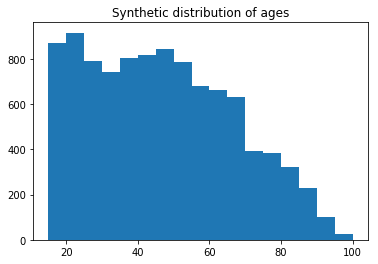

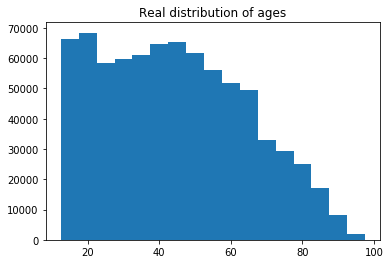

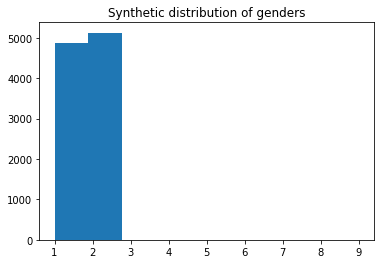

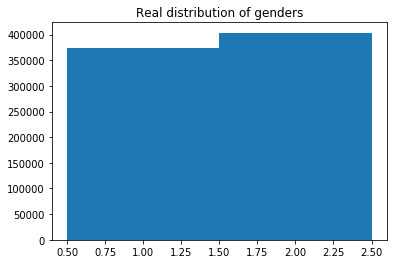

In [17]:
#### Distribution of ages
plt.hist(synthpop['age'],range=(15,100),bins=17)
plt.title("Synthetic distribution of ages")
plt.show()


page=pop35.groupby(['age']).agg({'value':"sum"})
plt.figure()
plt.bar(page.index,page['value'],width=5)
plt.title("Real distribution of ages")
plt.show()

#### Distribution of genders
plt.figure()
plt.hist(synthpop['sex'],bins=9,range=(1,9))
plt.title("Synthetic distribution of genders")
plt.show()


page=pop35.groupby(['sex']).agg({'value':"sum"})
plt.figure()
plt.bar(page.index,page['value'],width=1)
plt.title("Real distribution of genders")
plt.show()

### Generation of drugs deliveries for the population
What we need:

- `drug_freq` the frequency of drug deliveries per age and per sex
- `synthpop` the synthetic population of Ille et Vilaine

In [88]:
drugfreq_020_1 = drug_freq[ (drug_freq['age']==0) & (drug_freq['sexe']==1) ]


drugfreq_020_2 = drug_freq[ (drug_freq['age']==0) & (drug_freq['sexe']==2) ]
drugfreq_2060_2 = drug_freq[ (drug_freq['age']==20) & (drug_freq['sexe']==2) ]
drugfreq_2060_1 = drug_freq[ (drug_freq['age']==20) & (drug_freq['sexe']==1) ]
drugfreq_6090_1 = drug_freq[ (drug_freq['age']==60) & (drug_freq['sexe']==1) ]
drugfreq_6090_2 = drug_freq[ (drug_freq['age']==60) & (drug_freq['sexe']==2) ]
drugfreq_90_1 = drug_freq[ (drug_freq['age']==90) & (drug_freq['sexe']==1) ]
drugfreq_90_2 = drug_freq[ (drug_freq['age']==90) & (drug_freq['sexe']==2) ]


def generate(p):
    if p['age']<20:
        if p['sex']==1:
            nb=int(np.abs(rd.normal(loc=20,scale=5)))
            drugs=rd.choice(np.array(drugfreq_020_1['CIP13']), nb, p=np.array(np.array(drugfreq_020_1['freq'])), replace=True)
            return drugs
        elif p['sex']==2:
            nb=int(np.abs(rd.normal(loc=20,scale=10)))
            drugs=rd.choice(np.array(drugfreq_020_2['CIP13']), nb, p=np.array(np.array(drugfreq_020_2['freq'])), replace=True)
            return drugs
    elif p['age']<40:
        if p['sex']==1:
            nb=int(np.abs(rd.normal(loc=50,scale=10)))
            drugs=rd.choice(np.array(drugfreq_2060_1['CIP13']), nb, p=np.array(np.array(drugfreq_2060_1['freq'])), replace=True)
            return drugs
        elif p['sex']==2:
            nb=int(np.abs(rd.normal(loc=50,scale=10)))
            drugs=rd.choice(np.array(drugfreq_2060_2['CIP13']), nb, p=np.array(np.array(drugfreq_2060_2['freq'])), replace=True)
            return drugs
    elif p['age']<90:
        if p['sex']==1:
            nb=int(np.abs(rd.normal(loc=80,scale=10)))
            drugs=rd.choice(np.array(drugfreq_6090_1['CIP13']), nb, p=np.array(np.array(drugfreq_6090_1['freq'])), replace=True)
            return drugs
        elif p['sex']==2:
            nb=int(np.abs(rd.normal(loc=80,scale=10)))
            drugs=rd.choice(np.array(drugfreq_6090_2['CIP13']), nb, p=np.array(np.array(drugfreq_6090_2['freq'])), replace=True)
            return drugs
    else:
        if p['sex']==1 and len(drugfreq_90_1['CIP13'])>0:
            nb=int(np.abs(rd.normal(loc=80,scale=10)))
            drugs=rd.choice(np.array(drugfreq_90_1['CIP13']), nb, p=np.array(np.array(drugfreq_90_1['freq'])), replace=True)
            return drugs
        elif p['sex']==2 and len(drugfreq_90_2['CIP13'])>0 :
            nb=int(np.abs(rd.normal(loc=80,scale=10)))
            drugs=rd.choice(np.array(drugfreq_90_2['CIP13']), nb, p=np.array(np.array(drugfreq_90_2['freq'])), replace=True)
            return drugs
        else:
            return []
        
print("generate")
df=synthpop.apply(generate, axis=1)
print("stacking")
deliveries = df.apply(pd.Series).stack().reset_index(drop=True)
print("done")

generate
stacking
done


### Compute the mean number of deliveries per patient

The number of deliveries can be obtained by computing the total number of drug boxes delivered for a group of patients (per age and sex) divided by the total amount of people in this group (known through `pop_saq`)

In [89]:
mean_nb_boxes=np.sum(drugfreq_020_1['count'])/np.sum(pop_saq[ (pop_saq["age"]>=0) & (pop_saq["age"]<=15) & (pop_saq['sex']=="1") ]['value'])
print(mean_nb_boxes)

mean_nb_boxes=np.sum(drugfreq_020_2['count'])/np.sum(pop_saq[ (pop_saq["age"]>=0) & (pop_saq["age"]<=15) & (pop_saq['sex']=="2") ]['value'])
print(mean_nb_boxes)

mean_nb_boxes=np.sum(drugfreq_2060_1['count'])/np.sum(pop_saq[ (pop_saq["age"]>=20) & (pop_saq["age"]<=55) & (pop_saq['sex']=="1") ]['value'])
print(mean_nb_boxes)

mean_nb_boxes=np.sum(drugfreq_2060_2['count'])/np.sum(pop_saq[ (pop_saq["age"]>=20) & (pop_saq["age"]<=55) & (pop_saq['sex']=="2") ]['value'])
print(mean_nb_boxes)

mean_nb_boxes=np.sum(drugfreq_6090_1['count'])/np.sum(pop_saq[ (pop_saq["age"]>=60) & (pop_saq["age"]<=85) & (pop_saq['sex']=="1") ]['value'])
print(mean_nb_boxes)

mean_nb_boxes=np.sum(drugfreq_6090_2['count'])/np.sum(pop_saq[ (pop_saq["age"]>=60) & (pop_saq["age"]<=85) & (pop_saq['sex']=="2") ]['value'])
print(mean_nb_boxes)

65188.37970580895
73694.83261689912
231426.06054205203
327101.91647131427
807273.0522653859
920318.7678570674


The results are very strange ... we have a huge number of boxes delivered per patients

- 65188 boxes per male teenager
- 73694 boxes per female teenager
- 231426 boxes per male adult
- 327101 boxes per male adult
- 807273 boxes per male elder
- 920318 boxes per male elder

## Open Bio -- Biologies
source: https://www.data.gouv.fr/fr/datasets/open-bio-base-complete-sur-les-depenses-de-biologie-medicale-interregimes/

Dataset correspondant aux biologies: donne les denombrements (`DNB`) de chaque actes de biologies par age, par sexe, par régime et par spécialisation du prescripteur.


In [21]:
import pandas as pd
biology = pd.read_csv("../data/OPEN_BIO_2018.zip", header=0, sep=';', encoding="utf-8")
del(biology["L_GRP"])
del(biology["L_ACTE"])
del(biology["REM"])
del(biology["BSE"])

biology

,GRP,ACTE,AGE,SEXE,BEN_REG,PSP_SPE,DNB
0,90,4,40,2,11,6,115
1,90,4,20,2,75,7,57
2,90,4,60,2,28,7,24
3,90,4,0,1,11,99,24
4,90,4,40,1,84,90,60
5,90,4,40,2,27,7,36
6,90,4,60,2,11,1,29
7,90,4,40,2,93,1,20
8,90,4,40,2,93,90,40
9,90,4,40,2,24,90,130


In [22]:
biology.groupby(["GRP","ACTE","AGE","SEXE"]).agg({"DNB":["sum"]})

DNB
                        sum
GRP ACTE AGE SEXE          
1   1104 0   1      1125930
             2      1543738
         20  1      2544450
             2      7383140
         40  1      6374417
             2      8563851
         60  1     14661140
             2     16773641
         99  1        12566
             2        11926
             9          995
    1107 0   1        74161
             2        59152
         20  1       239436
             2       414532
         40  1       410496
             2       531568
         60  1       785243
             2       965134
         99  1          346
             2          288
    1109 0   1        40374
             2        41693
         20  1        37055
             2        89342
         40  1       120574
             2       144409
         60  1       521464
             2       469088
         99  1          589
...                     ...
90  7415 20  2         1426
         40  1          437
             2          419
         60  1          411
             2          117
    7420 0   1         5664
             2         7649
         20  1         6367
             2        24317
         40  1        12210
             2        27713
         60  1        16597
             2        22475
         99  2           18
    7423 0   1         2383
             2         1826
         20  1         1500
             2         4047
         40  1         2627
             2         4704
         60  1         2496
             2         3306
    8000 0   1          182
             2          176
         20  1         1742
             2         1241
         40  1         5566
             2         2694
         60  1         6452
             2         3457

[6409 rows x 1 columns]

## Open DAMIR data
Source: https://www.data.gouv.fr/fr/datasets/depenses-d-assurance-maladie-hors-prestations-hospitalieres-par-caisse-primaire-departement/

Jeu de données aggrégé sur les remboursements hors hopital. 

Le jeux indique les dénombrements de prestations (identifié par `PRS_NAT`) : `act_dnb` par CPAM (donc par departement ...), par spécialisation de l'exécutant (et son status Libéral/salarié) par TOP (?)

Il n'y a pas d'information sur les patients (sexe, age).

In [8]:
import pandas as pd
damir = pd.read_csv("../data/R201901.CSV", header=0, sep=';', encoding="latin-1")
damir

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cpam,l_cpam,dpt,l_dpt,region,l_region,l_serie,SERIE,prs_nat,l_prs_nat,...,l_exe_spe1,exe_stj1,l_exe_stj1,top_slm,l_top_slm,rem_mon,rec_mon,dep_mon,act_dnb,act_coe
0,781,781-Versailles,78,78-Yvelines,11,11-ILE DE FRANCE,C Omnipraticiens,111111,1098,CONSULTATION CCMU 3,...,Médecins Omnipraticiens,1,Libéral,0,0-TOP Hors Sections Locales Mutualistes,"0,00","0,00","0,00",0,"0,00"
1,751,751-Paris,75,75-Paris,11,11-ILE DE FRANCE,C Omnipraticiens,111111,1098,CONSULTATION CCMU 3,...,Médecins Omnipraticiens,1,Libéral,1,1-TOP Sections Locales Mutualistes,"31,88","39,85","9,85",2,"2,00"
2,771,771-Melun,77,77-Seine-et-Marne,11,11-ILE DE FRANCE,C Omnipraticiens,111111,1098,CONSULTATION CCMU 3,...,Médecins Omnipraticiens,1,Libéral,0,0-TOP Hors Sections Locales Mutualistes,"24,00","30,00","0,00",1,"1,00"
3,781,781-Versailles,78,78-Yvelines,11,11-ILE DE FRANCE,C Omnipraticiens,111111,1098,CONSULTATION CCMU 3,...,Médecins Omnipraticiens,1,Libéral,0,0-TOP Hors Sections Locales Mutualistes,"432,00","540,00","0,00",18,"18,00"
4,781,781-Versailles,78,78-Yvelines,11,11-ILE DE FRANCE,C Omnipraticiens,111111,1098,CONSULTATION CCMU 3,...,Médecins Omnipraticiens,1,Libéral,1,1-TOP Sections Locales Mutualistes,"24,00","30,00","9,85",1,"1,00"
5,821,821-Montauban,82,82-Tarn-et-Garonne,73,73-MIDI PYRENEES,C Omnipraticiens,111111,1098,CONSULTATION CCMU 3,...,Médecins Omnipraticiens,1,Libéral,1,1-TOP Sections Locales Mutualistes,"-24,00","-30,00","0,00",-1,"-1,00"
6,781,781-Versailles,78,78-Yvelines,11,11-ILE DE FRANCE,C Omnipraticiens,111111,1098,CONSULTATION CCMU 3,...,Médecins Omnipraticiens,1,Libéral,0,0-TOP Hors Sections Locales Mutualistes,"24,00","30,00","0,00",1,"1,00"
7,941,941-Créteil,94,94-Val-de-Marne,11,11-ILE DE FRANCE,C Omnipraticiens,111111,1098,CONSULTATION CCMU 3,...,Médecins Omnipraticiens,1,Libéral,0,0-TOP Hors Sections Locales Mutualistes,"-24,00","-30,00","0,00",-1,"-1,00"
8,342,342-Montpellier,34,34-Hérault,91,91-LANGUEDOC ROUSSILLON,C Omnipraticiens,111111,1098,CONSULTATION CCMU 3,...,Médecins Omnipraticiens,1,Libéral,0,0-TOP Hors Sections Locales Mutualistes,"0,00","0,00","0,00",0,"0,00"
9,623,623-Calais,62,62-Pas-de-Calais,31,31-NORD PAS DE CALAIS,C Omnipraticiens,111111,1098,CONSULTATION CCMU 3,...,Médecins Omnipraticiens,1,Libéral,0,0-TOP Hors Sections Locales Mutualistes,"30,00","30,00","0,00",1,"1,00"


In [15]:
#remove labels [the dataset can be downloaded without labels]
try:
    del(damir["l_cpam"])
    del(damir["dpt"])
    del(damir["l_dpt"])
    del(damir["region"])
    del(damir["l_region"])
    del(damir["l_serie"])
    del(damir["l_prs_nat"])
    del(damir["l_exe_spe"])
    del(damir["l_exe_spe1"])
    del(damir["l_exe_stj1"])
    del(damir["l_top_slm"])
    del(damir["rem_mon"])
    del(damir["rec_mon"])
    del(damir["dep_mon"])
    del(damir["act_coe"])
    del(damir["l_asu_nat"])
    del(damir["l_cpl_cod"])
    del(damir["l_pre_spe"])
    del(damir["l_pre_spe1"])
    del(damir["l_pre_stj1"])
    del(damir["REM_TAU"])
    del(damir["l_ben_qlt"])
except:
    pass
damir

Index(['cpam', 'SERIE', 'prs_nat', 'sns_date', 'asu_nat', 'cpl_cod', 'ben_qlt',
       'pre_spe', 'pre_spe1', 'pre_stj1', 'exe_spe', 'l_exe_spe', 'exe_spe1',
       'exe_stj1', 'top_slm', 'act_dnb'],
      dtype='object')

In [16]:
damir


,cpam,SERIE,prs_nat,sns_date,asu_nat,cpl_cod,ben_qlt,pre_spe,pre_spe1,pre_stj1,exe_spe,l_exe_spe,exe_spe1,exe_stj1,top_slm,act_dnb
0,781,111111,1098,201801,1,0,2,1,1,1,1,01-TOTAL Omnipraticiens,11,1,0,0
1,751,111111,1098,201801,1,0,1,1,1,1,1,01-TOTAL Omnipraticiens,11,1,1,2
2,771,111111,1098,201801,1,0,1,1,1,1,1,01-TOTAL Omnipraticiens,11,1,0,1
3,781,111111,1098,201801,1,0,1,1,1,1,1,01-TOTAL Omnipraticiens,11,1,0,18
4,781,111111,1098,201801,1,0,1,1,1,1,1,01-TOTAL Omnipraticiens,11,1,1,1
5,821,111111,1098,201801,1,0,1,1,1,1,1,01-TOTAL Omnipraticiens,11,1,1,-1
6,781,111111,1098,201801,1,0,2,1,1,1,1,01-TOTAL Omnipraticiens,11,1,0,1
7,941,111111,1098,201801,1,0,3,1,1,1,1,01-TOTAL Omnipraticiens,11,1,0,-1
8,342,111111,1098,201801,1,0,1,1,1,1,1,01-TOTAL Omnipraticiens,11,1,0,0
9,623,111111,1098,201801,1,0,1,1,1,1,1,01-TOTAL Omnipraticiens,11,1,0,1
